# Adaptive WiFi Load Balancing using Deep Q-learning

Here we are trying to map STAs to APs considering an enterprise network model.

###  Importing modules 

In [1]:
%matplotlib notebook
import os
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat,savemat
from numpy import random
from random import uniform
import shutil # to copy files to a speicific folder
''' import custom modules '''
from algorithms import Station_map,STA_clustering
''' copy file to desired folder'''
copy = False
filenum=5
import DQN_v2 as rl

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


###  Import STA bitrate data
This bitrate are considered as upload bit rate and download bitrate per station and those are fed and fetched from APs.
Here we have the bitrate data for 200 Stations over a period of 2 days approximately.

In [2]:
UL_Rate = loadmat('UL_Rate.mat')
UL_R =  UL_Rate['UL_Rate'].T
DL_Rate = loadmat('DL_Rate.mat')
DL_R =  DL_Rate['DL_Rate'].T
NTs,N_STA = DL_R.shape # N_STA : Number of stations, NTs : Number of Timestames (length of the data for each station)

### Set NS3 network directory 

Since NS3 can only be run from the directory "Scratch" , hence if we have any NS3 network model we should store it in "$ns-3/ns-3.28/scratch$" folder.

$Note:$ the folder names could vary according to the NS3 installation

os.chdir('/home/koushik/ns-3/ns-3.28/')

### Initialize network simulation parameters 

In [3]:
nSTAs= 6 #int(N_STA) # number of stations in the network
nAPs = 2  # numbe of APs in the network
area = 15 # cross section area of the network, ex: 200X200 # parameter in meters
sim_Time =  2 # in seconds
visualize = False # visualize simulation 
MCS = -7

In [4]:
''' a simple mapping of STA to AP: we get this from our algorithm '''
random.seed(1)
xloc  = random.randint(area,size=nSTAs)#random.uniform(area,size=nSTAs) #
random.seed(10)
yloc  = random.randint(area,size=nSTAs)#random.uniform(area,size=nSTAs)#
x =  xloc.reshape([nSTAs,1])
y =  yloc.reshape([nSTAs,1])
STA_loc =  np.append(x,y,axis=1);
AP_loc = np.array([[0,0],[area/2,0],[area,0],[area,area/2],[area,area],
                   [area/2,area],[0,area],[0,area/2],[area/2,area/2]]);
res={}
random.seed()

In [5]:
S_map = Station_map(area,nAPs,nSTAs,AP_loc)

### Initializing RL parameters

In [6]:
actions ={} # collect all possible actions based on station mapping
n_states  =  nAPs**nSTAs # totoal number of states in load balancing
#actions =  RL_model.get_action() # combined actions for all the agents 
n_actions =  nAPs**nSTAs# len(actions) # total number of combined actions 
epoch = 5000;
epoch1=1;
lst =  list(itertools.product(np.arange(nAPs), repeat=nSTAs)) # generate all possible mappings of STA--> AP
actions = dict(zip(np.arange(n_actions),np.array(lst)))
action =  random.randint(0,n_actions-1)
STA_map=actions[(action)];

<IPython.core.display.Javascript object>


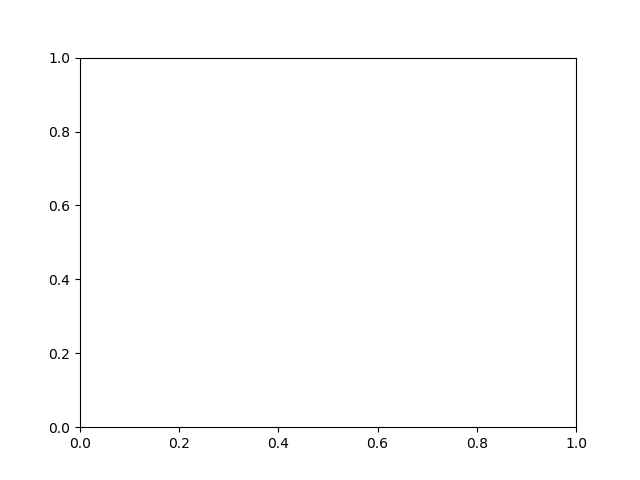

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/home/koushik/ns-3/ns-3.28/'

In [7]:
epoch = 5000*1
epoch1=1
model_dir= './Model/'
import time
import pandas as pd
x=time.ctime()
render = False    
R = {}
''' real-time plotting '''
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()
agent = rl.Agent(UL_R,DL_R,xloc,yloc,AP_loc,area,nSTAs,nAPs,sim_Time,visualize,MCS,n_actions,actions,epoch,epoch1,model_dir,render)   
for i in range(5):
    R1=agent.run(fig,ax)
    R[i] = pd.Series(R1)
    df= pd.DataFrame(R,columns=list(R.keys()))
    df.to_csv('DQN_'+x+'.csv')   

#### Save the collected reward data to a file in the foleder named "Data"

In [ ]:
import time
import pandas as pd
x=time.ctime()
df= pd.DataFrame(R,columns=list(R.keys()))
df.to_csv('DQN_'+x+'.csv')

%matplotlib inline
fig, ax = plt.subplots( nrows=1, ncols=1 )
plt.plot(R[0:])
plt.ylim([0,np.max(R[0:])+ 1])
plt.ylabel('Average of victories per game')
plt.xlim([0,len(R[0:])])
plt.xlabel('number of iterations')
plt.grid()
if Jamming:
    fig.savefig(filepath+ 'R_Jam'+ x +'.png')
else:
    fig.savefig(filepath+ 'R_noJ'+ x +'.png')
plt.show()

R1
reward=[0];
for i in range(len(R)-1):
    reward.append((R[i]+R[i+1])/2) 
fig, ax = plt.subplots( nrows=1, ncols=1 )
plt.plot(reward)
plt.ylim([0,np.max(R[2:])+ 1])
plt.ylabel('Average of victories per game')
plt.xlim([0,len(R[2:])])
plt.xlabel('number of iterations')
plt.grid()
plt.show()
fig.savefig(filepath+ 'Rm_'+ x +'.pdf',bbox_inches='tight')